In [1]:
import sys
sys.path.append('../')

import tensorflow as tf
import graphgallery 
import matplotlib.pyplot as plt


# Set if memory growth should be enabled for ALL `PhysicalDevice`.
graphgallery.set_memory_growth()

2 Physical GPUs, 2 Logical GPUs


In [2]:
tf.__version__

'2.1.0'

In [3]:
graphgallery.__version__

'0.2.0'

# Load the Datasets
+ cora
+ citeseer
+ pubmed

In [4]:
from graphgallery.data import Planetoid

# set `verbose=False` to avoid these printed tables
data = Planetoid('cora', root="~/GraphData/datasets", verbose=False)
adj, x, labels = data.graph.unpack()
idx_train, idx_val, idx_test = data.split()


Downloaded dataset files have existed.
Processing...
Processing completed.


In [5]:
data.supported_datasets

{'citeseer', 'cora', 'pubmed'}

# SGC model
+ adj: Scipy sparse matrix
+ x: Numpy array-like matrix
+ labels: Numpy array
+ device: can be "CPU" or "GPU"
+ norm_x: `l1` for row-wise normalize for input `x`
+ order: The power (order) of adjacency matrix. (default 2)

In [6]:
from graphgallery.nn.models import SGC
model = SGC(adj, x, labels, device='GPU', norm_x='l1', order=2, seed=123)
model.build()
# train with validation
his = model.train(idx_train, idx_val, verbose=1, epochs=100)
# train without validation
# his = model.train(idx_train, verbose=1, epochs=100)
loss, accuracy = model.test(idx_test)
print(f'Test loss {loss:.5}, Test accuracy {accuracy:.2%}')


<Loss = 1.2188 Acc = 0.9786 Val_Loss = 1.6064 Val_Acc = 0.7840 >: 100%|██████████| 100/100 [00:03<00:00, 26.91it/s]


Test loss 1.6149, Test accuracy 80.80%


## Show model summary

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
attributes (InputLayer)      [(None, 1433)]            0         
_________________________________________________________________
dense (Dense)                (None, 7)                 10038     
Total params: 10,038
Trainable params: 10,038
Non-trainable params: 0
_________________________________________________________________


## Show parameters 

In [8]:
# show training parameters
model.show('train')

+-------------------+----------------------------+
|    Parameters     |           Value            |
+===================+============================+
| Name              | SGC                        |
+-------------------+----------------------------+
| as_model          | False                      |
+-------------------+----------------------------+
| callbacks         | None                       |
+-------------------+----------------------------+
| early_stop_metric | val_loss                   |
+-------------------+----------------------------+
| early_stopping    | None                       |
+-------------------+----------------------------+
| epochs            | 100                        |
+-------------------+----------------------------+
| kwargs            | {}                         |
+-------------------+----------------------------+
| monitor           | val_acc                    |
+-------------------+----------------------------+
| save_best         | True     

In [9]:
# show model parameters
model.show('model')

+------------+---------+
| Parameters |  Value  |
+============+=========+
| Name       | SGC     |
+------------+---------+
| l2_norms   | [5e-05] |
+------------+---------+
| lr         | 0.200   |
+------------+---------+
| use_bias   | True    |
+------------+---------+


In [10]:
# By defaule, show all
model.show()

+-------------------+----------------------------+
|    Parameters     |           Value            |
+===================+============================+
| Name              | SGC                        |
+-------------------+----------------------------+
| as_model          | False                      |
+-------------------+----------------------------+
| callbacks         | None                       |
+-------------------+----------------------------+
| device            | GPU                        |
+-------------------+----------------------------+
| early_stop_metric | val_loss                   |
+-------------------+----------------------------+
| early_stopping    | None                       |
+-------------------+----------------------------+
| epochs            | 100                        |
+-------------------+----------------------------+
| kwargs            | {}                         |
+-------------------+----------------------------+
| l2_norms          | [5e-05]  

## Visualization Training 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


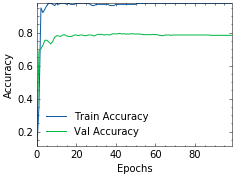

In [11]:
# NOTE: you must install SciencePlots package for a better preview.
with plt.style.context(['science', 'no-latex']):
    plt.plot(his.history['acc'])
    plt.plot(his.history['val_acc'])
    plt.legend(['Train Accuracy', 'Val Accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.autoscale(tight=True)
    plt.show()    

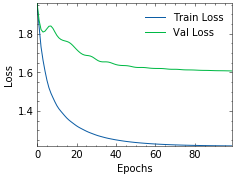

In [12]:
# NOTE: you must install SciencePlots package for a better preview.
with plt.style.context(['science', 'no-latex']):
    plt.plot(his.history['loss'])
    plt.plot(his.history['val_loss'])
    plt.legend(['Train Loss', 'Val Loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.autoscale(tight=True)
    plt.show()    